In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


In [2]:
x = np.array([-0.03777662, -0.03381622, -0.02987144, -0.02594216, -0.02202826,
              -0.01812962, -0.01424612, -0.01037764, -0.00652407, -0.0026853 ,
               0.0011388 ,  0.00494833,  0.0087434 ,  0.01252412,  0.0162906 ,
               0.02004295,  0.02378127,  0.02750567,  0.03121625])

iv = [0.1701967137143985, 0.16404843898761992, 0.1589248767153044,
      0.15593613205645368, 0.14914594079361243, 0.1458396418971009,
      0.1400961172808467, 0.13803114875853112, 0.13416207558176235,
      0.1341469305722126, 0.13324756737634427, 0.1338806884416337,
      0.13507658378718043, 0.1369759469830487, 0.1356393580674377,
      0.13718698733814522, 0.14105606051491404, 0.1405636330196889,
      0.14267403657065372]

atm_vol = 0.1338131889
method = 'sigmoid'


[(array([0.13381319]), array([-0.07609168,  4.03282914, 11.49503836]))]


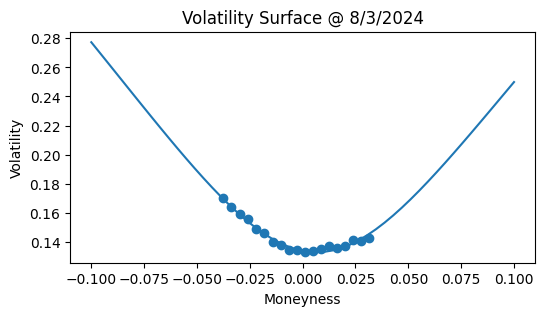

In [3]:
def Calibration(x, delta, kappa, gamma):
    # vol_atm = np.array([atm_vol])
    y = delta * (np.tanh(kappa * x) / kappa) + 0.5 * gamma * (np.tanh(kappa * x) / kappa)**2 + vol_atm**2
    return y

calibration = []

# Assuming x and iv are NumPy arrays
x = np.array(x)
iv = np.array(iv)

# Make vol_atm a NumPy array

# Calculate y using NumPy arrays
y = iv**2

vol_atm = np.array([atm_vol])
popt, pcov = curve_fit(Calibration, x, y)
calibration.append((vol_atm, popt))

print(calibration)

plt.figure(figsize=(6,3))

plt.scatter(x, iv)

x = np.linspace(-0.1, 0.1, 50)
y = np.sqrt(Calibration(x, popt[0], popt[1], popt[2]))

plt.plot(x,y)
plt.title('Volatility Surface @ 8/3/2024')
plt.xlabel('Moneyness')
plt.ylabel('Volatility')

plt.show()


In [4]:
# Define implied volatility curve function
def implied_vol_curve(x, delta, kappa, gamma):
    y = atm_vol**2 + delta * (np.tanh(kappa * x) / kappa) + 0.5 * gamma * (np.tanh(kappa * x) / kappa)**2
    return y

x = np.array(x)
# y = np.array(iv)

# Fit the curve using curve_fit
params, _ = curve_fit(implied_vol_curve, x, np.array(iv)**2, maxfev = 2000)

# Plot the original data points
plt.plot(x, iv, 'o', label='data')

# Plot the fitted curve
x_fit = np.linspace(min(x), max(x), 100)
plt.plot(x_fit, np.sqrt(implied_vol_curve(x_fit, *params)), label='fit')

plt.legend()
plt.xlabel('X')
plt.ylabel('Implied Volatility')
plt.title('Sigmoid Curve Fitting')
plt.show()

print('Fitted Parameters:', params)



ValueError: operands could not be broadcast together with shapes (50,) (19,) 

[-1.35606104e+00  1.64034938e+03 -2.28543166e+05]


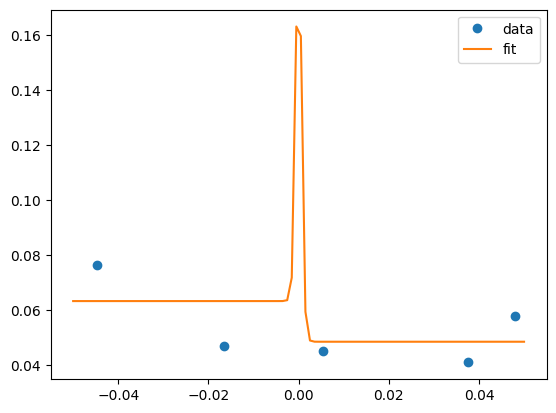

In [7]:
import numpy as np
x = [-0.03777662, -0.03381622, -0.02987144, -0.02594216, -0.02202826,
       -0.01812962, -0.01424612, -0.01037764, -0.00652407, -0.0026853 ,
        0.0011388 ,  0.00494833,  0.0087434 ,  0.01252412,  0.0162906 ,
        0.02004295,  0.02378127,  0.02750567,  0.03121625]
iv = [0.1701967137143985, 0.16404843898761992, 0.1589248767153044,
       0.15593613205645368, 0.14914594079361243, 0.1458396418971009,
       0.1430961172808467, 0.13803114875853112, 0.13416207558176235,
       0.1351469305722126, 0.13324756737634427, 0.1338806884416337,
       0.13507658378718043, 0.1369759469830487, 0.1356393580674377,
       0.13718698733814522, 0.14105606051491404, 0.1405636330196889,
       0.14267403657065372]
x = [-0.04463213, -0.01646126,  0.00551765,  0.03760596,  0.04807726]
iv = [0.07634134702435999, 0.046976420143647654, 0.04522183249574093, 0.0410862376904945, 0.057956406823396464]
atm_vol = 0.1338131889
atm_vol = 0.21368006453211058

def implied_vol_curve(x, delta, kappa, gamma):
       y = atm_vol**2 + delta * (np.tanh(kappa * x) / kappa) + 0.5 * gamma * (np.tanh(kappa * x) / kappa)**2
       return y 

from scipy.optimize import curve_fit
# x = np.array(x)

params, _ = curve_fit(implied_vol_curve, x, np.array(iv)**2, maxfev = 2000)
print(params)
# plot x vs iv
import matplotlib.pyplot as plt
plt.plot(x, iv, 'o', label='data')
x_fit = np.linspace(-0.05, 0.05, 100)
plt.plot(x_fit, np.sqrt(implied_vol_curve(x_fit, *params)), label='fit')
plt.legend()

In [ ]:
def Calibration(x, delta, kappa, gamma):
    sigmoid = 1/(1 + np.exp(-kappa*x))
    tanh = np.tanh(kappa*x)
    model = delta*tanh/kappa + gamma/2*(tanh/kappa)**2
    return model

calibration = []

# Assuming x and iv are NumPy arrays
x = np.array(x)
iv = np.array(iv)

# Make vol_atm a NumPy array
vol_atm = np.array([atm_vol])

# Calculate y using NumPy arrays
y = iv**2 - vol_atm**2

popt, pcov = curve_fit(Calibration, x, y)
calibration.append((vol_atm, popt))

print(calibration)

plt.figure(figsize=(6,3))

plt.scatter(x, iv)

x = np.linspace(-0.1, 0.1, 50)
y = np.sqrt(Calibration(x, popt[0], popt[1], popt[2]) + atm_vol**2)

plt.plot(x,y)
plt.title('Volatility Surface @ 8/3/2024')
plt.xlabel('Moneyness')
plt.ylabel('Volatility')

plt.show()


In [ ]:
def Calibration(x, delta, kappa, gamma):
    y = delta * (np.tanh(kappa * x) / kappa) + 0.5 * gamma * (np.tanh(kappa * x) / kappa)**2
    return y

calibration = []

# Assuming x and iv are NumPy arrays
x = np.array(x)
iv = np.array(iv)

# Make vol_atm a NumPy array
vol_atm = np.array([atm_vol])

# Calculate y using NumPy arrays
y = iv**2 - vol_atm**2

popt, pcov = curve_fit(Calibration, x, y)
calibration.append((vol_atm, popt))

print(calibration)

plt.figure(figsize=(6,3))

plt.scatter(x, iv)

x = np.linspace(-0.1, 0.1, 50)
y = np.sqrt(Calibration(x, popt[0], popt[1], popt[2]) + atm_vol**2)

plt.plot(x,y)
plt.title('Volatility Surface @ 8/3/2024')
plt.xlabel('Moneyness')
plt.ylabel('Volatility')

plt.show()


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
from scipy.interpolate import CubicSpline

# Convert date strings to numeric values
bs_iv_curve_params = bs_iv_curve_params_spx

# Create a meshgrid for forward moneyness and maturities
fwd_mny_grid = np.linspace(0.9, 1.1, 100)
implied_vol_expiry = pd.DataFrame(index = fwd_mny_grid, columns = bs_iv_curve_params.index)

# Function to calculate implied volatility using the parametric model
def implied_vol_curve(x, atm_vol, delta, kappa, gamma):
    y = atm_vol**2 + delta * (np.tanh(kappa * x) / kappa) + 0.5 * gamma * (np.tanh(kappa * x) / kappa)**2
    return y

# Loop over each expiry and calculate implied volatility values
for i, expiry in enumerate(bs_iv_curve_params.index):
    # Extract parameters for the current expiry
    params = bs_iv_curve_params.loc[expiry].values
    atm_vol = params[0]

    # Calculate implied volatility values for the current expiry
    implied_vol_expiry.loc[:, expiry] = implied_vol_curve(fwd_mny_grid, atm_vol, params[1], params[2], params[3])

display(implied_vol_expiry.head())

NameError: name 'bs_iv_curve_params_spx' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import date2num
from scipy.interpolate import CubicSpline
from mpl_toolkits.mplot3d import Axes3D

# Convert date strings to numeric values
expiry_list_nu = date2num(bs_iv_curve_params.index)

# Create a meshgrid for forward moneyness and maturities
fwd_mny_grid = np.linspace(-1, 1, 20)
implied_vol_expiry = pd.DataFrame(index=fwd_mny_grid, columns=bs_iv_curve_params.index)

# Function to calculate implied volatility using the parametric model
def implied_vol_curve(x, atm_vol, delta, kappa, gamma):
    y = atm_vol**2 + delta * (np.tanh(kappa * x) / kappa) + 0.5 * gamma * (np.tanh(kappa * x) / kappa)**2
    return y

# Loop over each expiry and calculate implied volatility values
for i, expiry in enumerate(bs_iv_curve_params.index):
    # Extract parameters for the current expiry
    params = bs_iv_curve_params.loc[expiry].values
    atm_vol = params[0]

    # Calculate implied volatility values for the current expiry
    implied_vol_expiry.loc[:, expiry] = implied_vol_curve(fwd_mny_grid, atm_vol, params[1], params[2], params[3])

# Create a 1D array of unique maturities for CubicSpline
expiry_grid = np.linspace(min(expiry_list_nu), max(expiry_list_nu), 20)

# Initialize an empty DataFrame to store interpolated implied volatility values
implied_vol_surface = pd.DataFrame(index=fwd_mny_grid, columns=expiry_grid)

# Perform cubic spline interpolation for each strike
for i in range(len(fwd_mny_grid)):
    iv_cs = CubicSpline(expiry_list_nu, implied_vol_expiry.iloc[i, :].values)
    implied_vol_surface.iloc[i, :] = iv_cs(expiry_grid)


# Create meshgrid for 3D plotting
X, Y = np.meshgrid(fwd_mny_grid, expiry_grid)


NameError: name 'X' is not defined

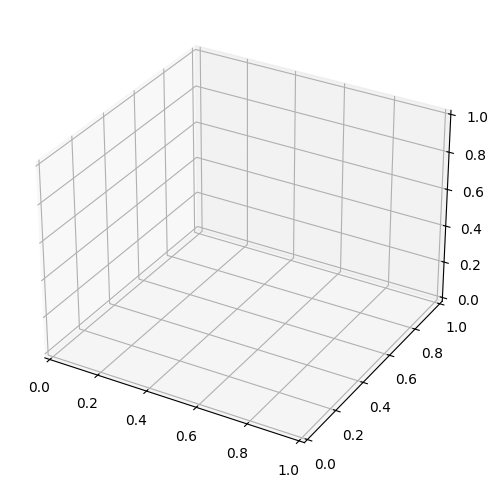

In [8]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the implied volatility surface
ax.plot_surface(X, Y, implied_vol_surface.T.values)

# Set labels and title
ax.set_xlabel('Forward Moneyness')
ax.set_ylabel('Expiry')
ax.set_zlabel('Implied Volatility')
ax.set_title('Implied Volatility Surface')

plt.show()


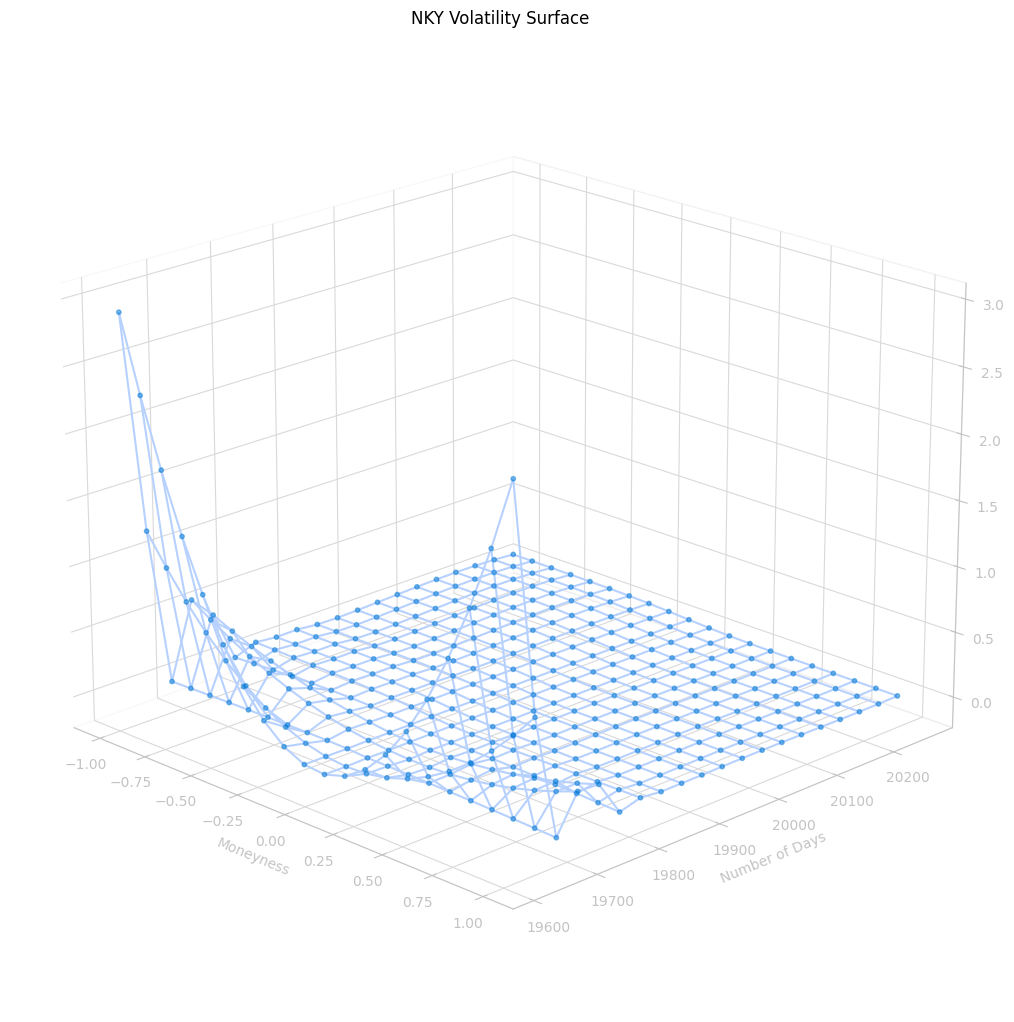

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
from scipy.interpolate import CubicSpline

# Create a 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_wireframe(X, Y, implied_vol_surface.T.values, alpha=1, edgecolor='#b7d1ff')

# Plot the scatter
ax.scatter(X, Y, implied_vol_surface.T.values, color='#0078d4', s=10, alpha=0.5)

# Make the surface transparent
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  '#d9d9d9'
ax.yaxis._axinfo["grid"]['color'] =  '#d9d9d9'
ax.zaxis._axinfo["grid"]['color'] =  '#d9d9d9'

# Set labels and title
ax.set_title('NKY Volatility Surface')
ax.set_xlabel('Moneyness')
ax.set_ylabel('Number of Days')
ax.set_zlabel('Volatility')

# Adjust tick size
ax.tick_params(axis='both', which='major', labelsize=10)
# set axis color
ax.xaxis.label.set_color('#c3c3c3')
ax.yaxis.label.set_color('#c3c3c3')
ax.zaxis.label.set_color('#c3c3c3')

# set tick color
ax.tick_params(axis='x', colors='#c3c3c3')
ax.tick_params(axis='y', colors='#c3c3c3')
ax.tick_params(axis='z', colors='#c3c3c3')

# set axis color
ax.xaxis.line.set_color('#c3c3c3')
ax.yaxis.line.set_color('#c3c3c3')
ax.zaxis.line.set_color('#c3c3c3')

# Add grid lines with a dashed style
# ax.grid(True, linestyle='--', alpha=0.6)

ax.view_init(elev=20, azim=135)
# invert x-axis
ax.invert_xaxis()
ax.invert_yaxis()

plt.show()
